In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from yellowbrick.cluster import KElbowVisualizer
import plotly as px



In [30]:
data = pd.read_csv('Dataset/Dataset.csv')

In [31]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [32]:
data.shape

(5630, 20)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [34]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [35]:
data = data.dropna()
data = data.drop_duplicates()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress        

In [37]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     1982
Single      1245
Divorced     547
Name: count, dtype: int64

In [38]:
data = data.replace(
    {
        "PreferredLoginDevice":{
            "Mobile Phone":1,
            "Computer":2,
            "Phone":3,
        },
        "PreferredPaymentMode":{
            "Debit Card":1,
            "Credit Card":2,
            "E wallet":3,
            "COD":4,
            "UPI":5,
            "Cash on Delivery":6,
            "CC":7
        },
        "Gender":{
            "Male":1,
            "Female":2
        },
        "PreferedOrderCat":{
            "Laptop & Accessory":1,
            "Mobile Phone":2,
            "Fashion":3,
            "Mobile":4,
            "Others":5,
            "Grocery":6
        },
        "MaritalStatus":{
            "Married":1,
            "Single":2,
            "Divorced":3
        }
        
        
    }
)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   int64  
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   int64  
 7   Gender                       3774 non-null   int64  
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   int64  
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   int64  
 13  NumberOfAddress        

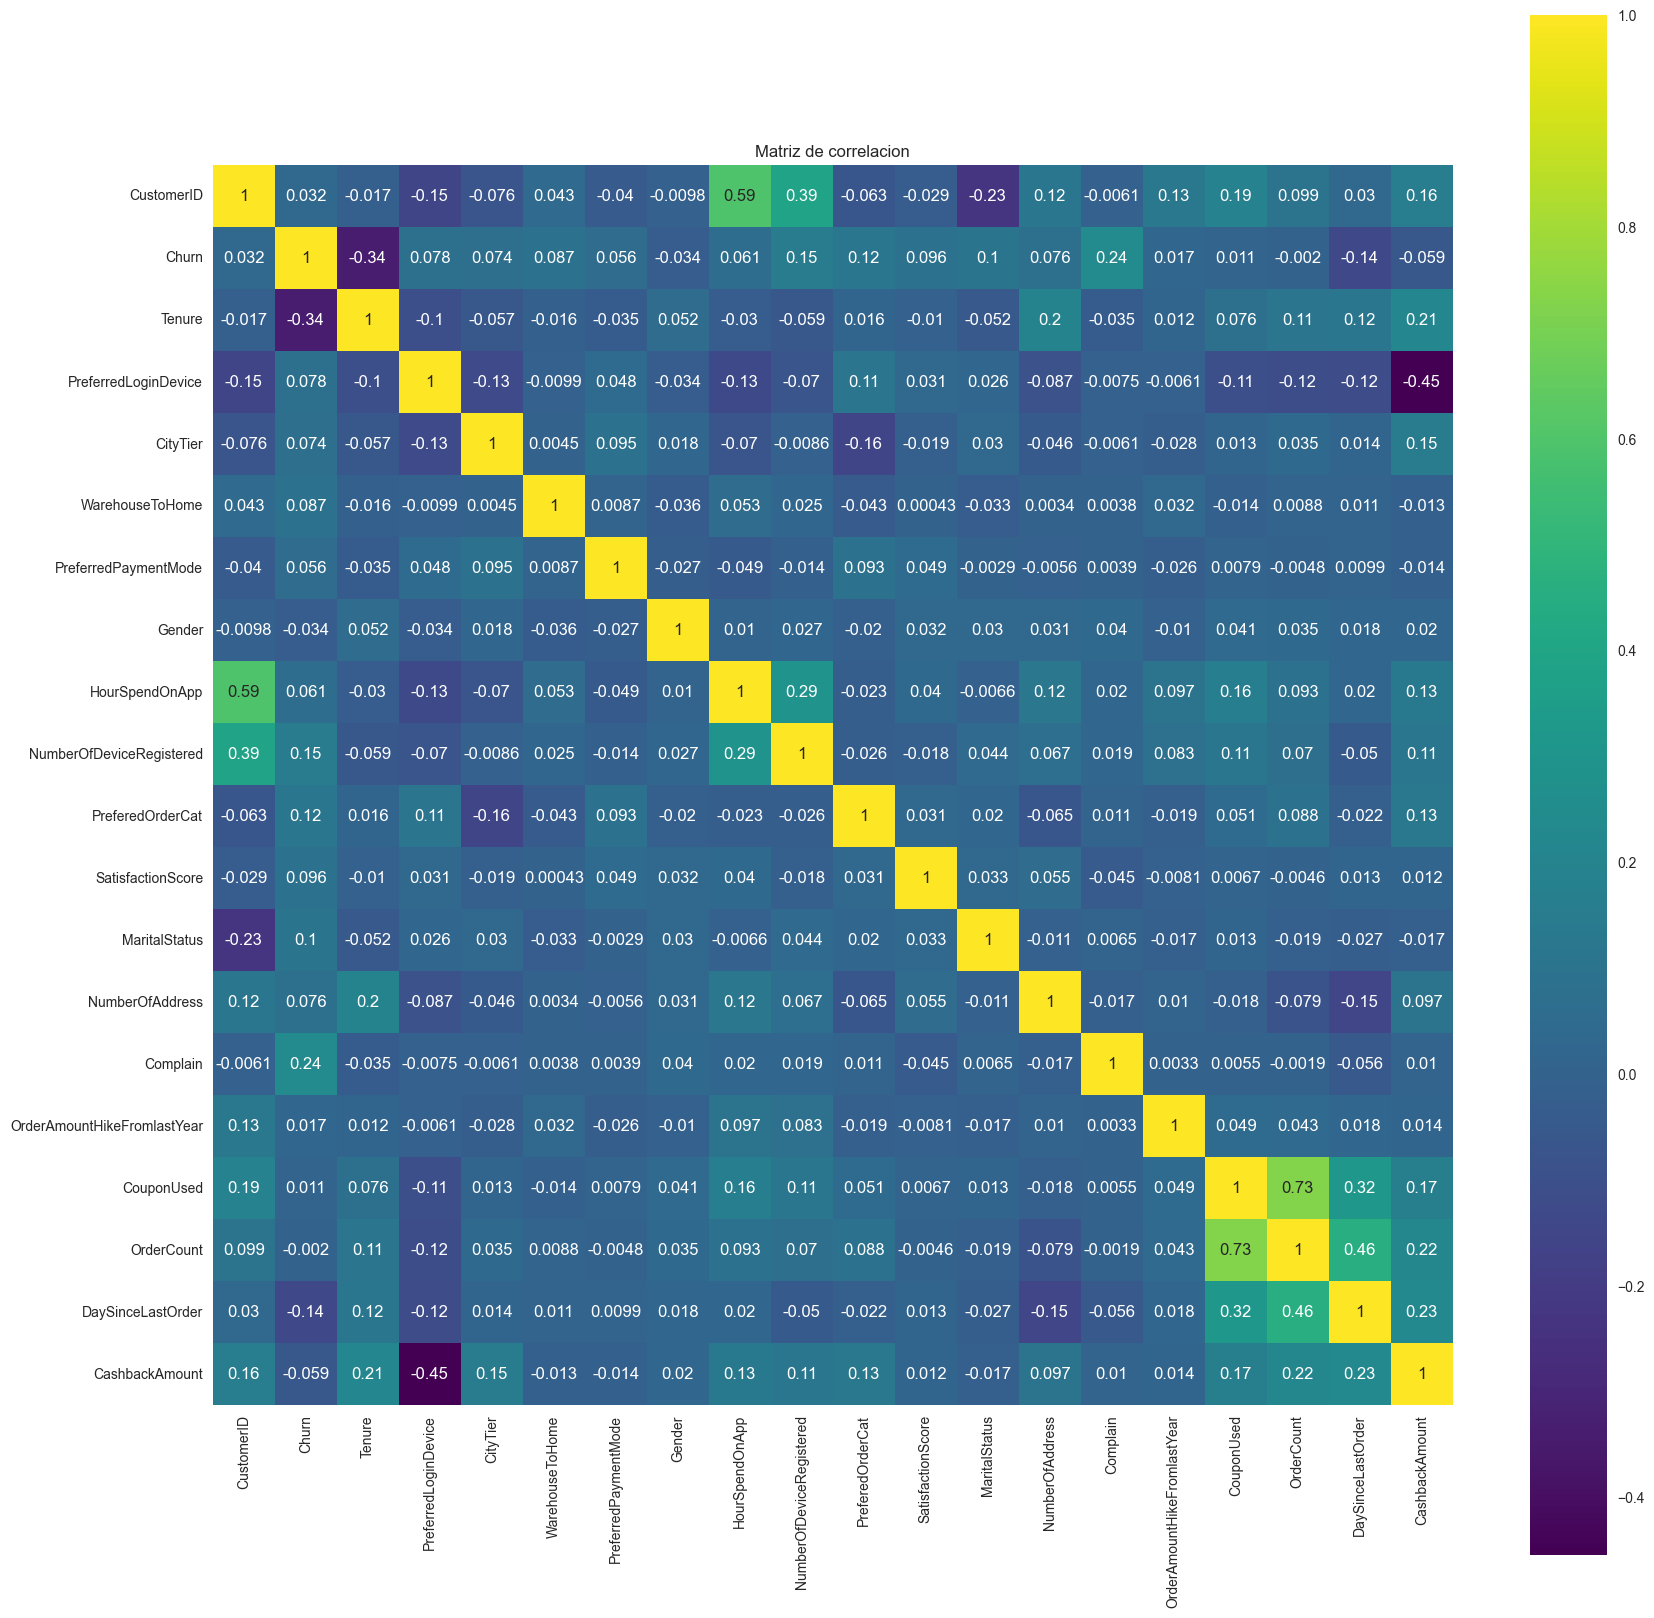

In [40]:
cor = data.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()


In [41]:
X = data.drop(['CustomerID','Churn','SatisfactionScore'], axis=1)

c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Stefano\Documents\GitHub\

<Axes: xlabel='Clusters', ylabel='WSS'>

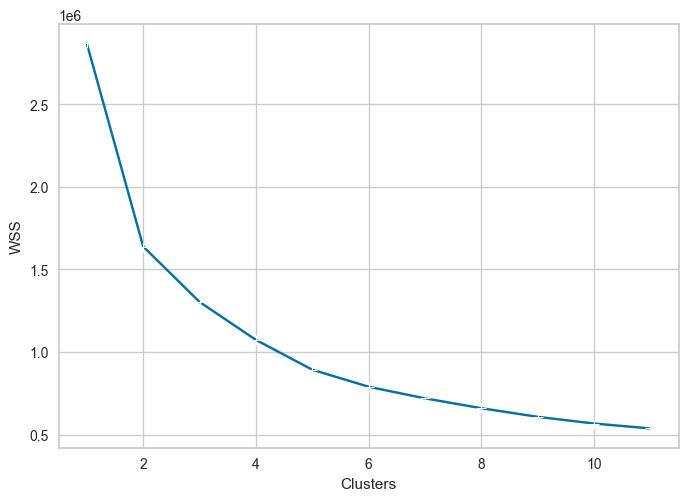

In [42]:
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

In [43]:
import sklearn.metrics as metrics

SK = range(2,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    score = metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 2 is 0.4114135691620946
Silhouette score for k(clusters) = 3 is 0.29222354519435784


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 4 is 0.28022177282738686


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 5 is 0.2900794822084495


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 6 is 0.2630450195506122


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 7 is 0.21403481641659047


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 8 is 0.25041641406175064


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 9 is 0.23454684723987926


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 10 is 0.21579236901396492


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 11 is 0.2188689945183026


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k(clusters) = 12 is 0.22036018665958396


c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Stefano\Documents\GitHub\

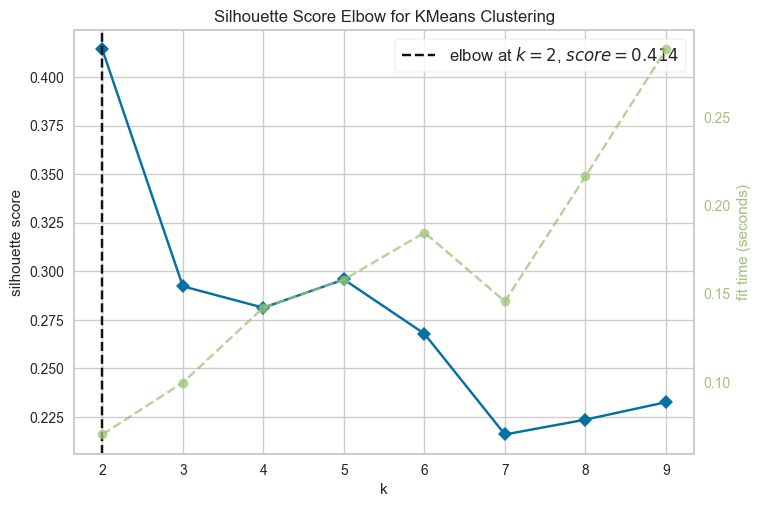

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()      

In [45]:
clustering = cluster.KMeans(n_clusters=2, random_state=0).fit(X)
label = clustering.predict(X)
center = clustering.cluster_centers_

c:\Users\Stefano\Documents\GitHub\EcommerceSegmentationCustomersApp\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
from sklearn.metrics import silhouette_score

silhouette_score(X, clustering.labels_)

0.4143012875893028

In [47]:
X['Cluster'] = clustering.labels_
data_cluster = pd.concat([data['CustomerID'],X], axis=1)


In [48]:
data_cluster.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,50001,4.0,1,3,6.0,1,2,3.0,3,1,2,9,1,11.0,1.0,1.0,5.0,160,0
3,50004,0.0,3,3,15.0,1,1,2.0,4,1,2,8,0,23.0,0.0,1.0,3.0,134,0
5,50006,0.0,2,1,22.0,1,2,3.0,5,2,2,2,1,22.0,4.0,6.0,7.0,139,0
11,50012,11.0,1,1,6.0,1,1,3.0,4,3,2,10,1,13.0,0.0,1.0,0.0,154,0
12,50013,0.0,3,1,11.0,4,1,2.0,3,4,2,2,1,13.0,2.0,2.0,2.0,134,0


In [49]:
set_0 = data_cluster[data_cluster['Cluster'] == 0]
data_0_mean = set_0[['Tenure', 'CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']].mean()
data_0_mean_df = pd.DataFrame(data_0_mean)
df_0 = data_0_mean_df.T
df_0.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,7.677419,1.57697,15.683544,2.909351,3.680278,4.034708,0.279706,15.684361,1.513271,2.45488,3.952634,151.013475


In [50]:
set_1 = data_cluster[data_cluster['Cluster'] == 1]
data_1_mean = set_1[['Tenure', 'CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']].mean()
data_1_mean_df = pd.DataFrame(data_1_mean)
df_1 = data_1_mean_df.T
df_1.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,10.809057,1.949434,15.855094,3.113962,3.890566,4.552453,0.286792,15.807547,2.101132,3.510189,5.586415,188.615849


In [51]:
final_data = data_cluster

In [52]:
data_powerbi = final_data.replace(
    {
        "PreferredLoginDevice":{
            1:"Mobile Phone",
            2:"Computer",
            3:"Phone",
        },
        "PreferredPaymentMode":{
            1:"Debit Card",
            2:"Credit Card",
            3:"E wallet",
            4:"COD",
            5:"UPI",
            6:"Cash on Delivery",
            7:"CC"
        },
        "Gender":{
            1:"Male",
            2:"Female"
        },
        "PreferedOrderCat":{
            1:"Laptop & Accessory",
            2:"Mobile Phone",
            3:"Fashion",
            4:"Mobile",
            5:"Others",
            6:"Grocery"
        },
        "MaritalStatus":{
            1:"Married",
            2:"Single",
            3:"Divorced"
        }
        
        
    }
)

In [53]:
from pathlib import Path  
filepath = Path('Dataset/DataCluster.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_powerbi.to_csv(filepath) 